In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('clean_all_tablescombo.csv')

In [3]:
df_all =df.copy()

In [4]:
def whitespace_remove(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype == 'object':
            dataframe[i] = dataframe[i].map(str.strip)
        else:
            pass
        

In [5]:
whitespace_remove(df_all)

In [6]:
#replace column names 
df_all.rename(columns = {'HE Provider':'Provider', 'Region of HE provider':'Region', 'Terms of employment':'Employment_Terms','Contract levels':'Contract_levels','Atypical marker':'Atypical_Marker','Contract marker':'Contract_Marker','Academic Year':'Academic_Year','Category Marker':'Category_Marker'}, inplace = True)
df_all.head()

,UKPRN,Provider,Country of HE provider,Region,Employment_Terms,Contract_levels,Atypical_Marker,Contract_Marker,Academic_Year,Category_Marker,Category,Number
0,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,White,1095
1,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Black,25
2,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Asian,130
3,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Mixed,20
4,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Other,25


In [7]:
df_all.rename(columns = {'Country of HE provider':'Country'}, inplace =True)
df_all.head()

,UKPRN,Provider,Country,Region,Employment_Terms,Contract_levels,Atypical_Marker,Contract_Marker,Academic_Year,Category_Marker,Category,Number
0,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,White,1095
1,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Black,25
2,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Asian,130
3,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Mixed,20
4,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Other,25


In [8]:
#query to select ethnicity
university_ethnicity = df_all.query("Category_Marker == 'Ethnicity'")

In [9]:
university_ethnicity

,UKPRN,Provider,Country,Region,Employment_Terms,Contract_levels,Atypical_Marker,Contract_Marker,Academic_Year,Category_Marker,Category,Number
0,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,White,1095
1,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Black,25
2,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Asian,130
3,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Mixed,20
4,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Ethnicity,Other,25
...,...,...,...,...,...,...,...,...,...,...,...,...
209874,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Non-academic,Non-atypical,All (excluding atypical),2020/21,Ethnicity,White,55
209885,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Ethnicity,White,80
209886,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Ethnicity,Asian,5
209887,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Ethnicity,Mixed,5


In [10]:
#plot to view the university with the least 20 diverse ethnic employed
University_Category_small =university_ethnicity.groupby(['Provider','Category_Marker']).Number.agg('sum').sort_values().head(10)
University_Category_small

Provider                                                     Category_Marker
New Model Institute for Technology and Engineering (NMITE)*  Ethnicity           5
ThinkSpace Education Limited*                                Ethnicity           5
Backstage Academy (Training) Ltd*                            Ethnicity           5
The London Interdisciplinary School Ltd*                     Ethnicity           5
The London School of Architecture*                           Ethnicity           5
ICON College of Technology and Management*                   Ethnicity          10
Nelson College London Ltd                                    Ethnicity          10
Waverley Abbey College*                                      Ethnicity          15
Institute of Art - London Limited*                           Ethnicity          15
Kaplan Open Learning*                                        Ethnicity          15
Name: Number, dtype: int64

<AxesSubplot:xlabel='Provider,Category_Marker'>

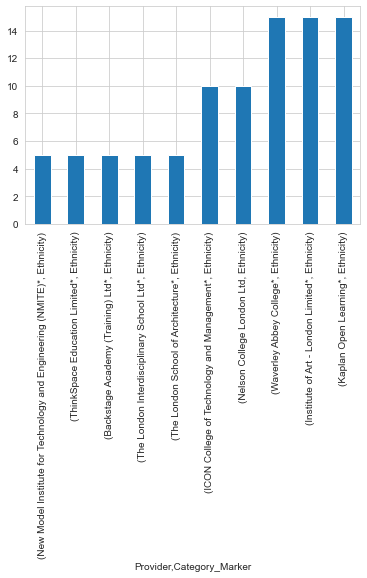

In [11]:
University_Category_small.plot(kind='bar',x='Provider')

In [12]:
#plot to view the university with the most 20 diverse ethnic employed
University_Category_large =university_ethnicity.groupby(['Provider','Category_Marker'])['Number'].sum().nlargest(10).reset_index()
University_Category_large

,Provider,Category_Marker,Number
0,The University of Oxford,Ethnicity,210705
1,University College London,Ethnicity,198330
2,The University of Edinburgh,Ethnicity,189965
3,The University of Manchester,Ethnicity,175065
4,The University of Cambridge,Ethnicity,164675
5,The University of Leeds,Ethnicity,121465
6,The University of Glasgow,Ethnicity,118480
7,"Imperial College of Science, Technology and Me...",Ethnicity,118285
8,King's College London,Ethnicity,117180
9,The University of Sheffield,Ethnicity,113050


<AxesSubplot:xlabel='Provider'>

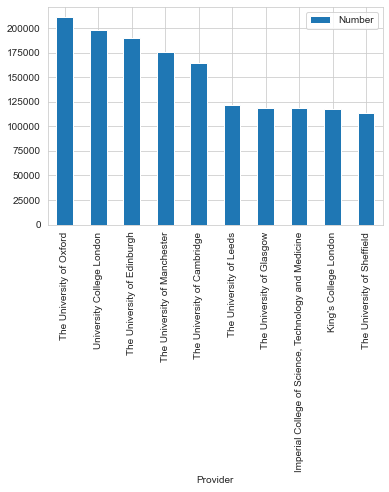

In [13]:
University_Category_large.plot(kind='bar',x='Provider')

In [14]:
University_color=university_ethnicity.groupby(['Provider','Category'])['Number'].sum().unstack(fill_value=0).reset_index()
University_color

Category,Provider,Asian,Black,Mixed,Not known,Other,White
0,ACM Guildford Limited*,0,25,10,5,5,180
1,AECC University College,0,0,20,30,0,595
2,AECC University College*,0,0,0,0,0,140
3,Abertay University,50,0,0,70,20,1720
4,Aberystwyth University,770,210,240,890,360,25895
...,...,...,...,...,...,...,...
260,Waverley Abbey College*,0,0,0,0,0,15
261,Writtle College,0,0,0,20,0,2620
262,Writtle University College,0,0,0,0,0,575
263,Writtle University College*,0,0,10,0,0,265


<AxesSubplot:xlabel='Provider'>

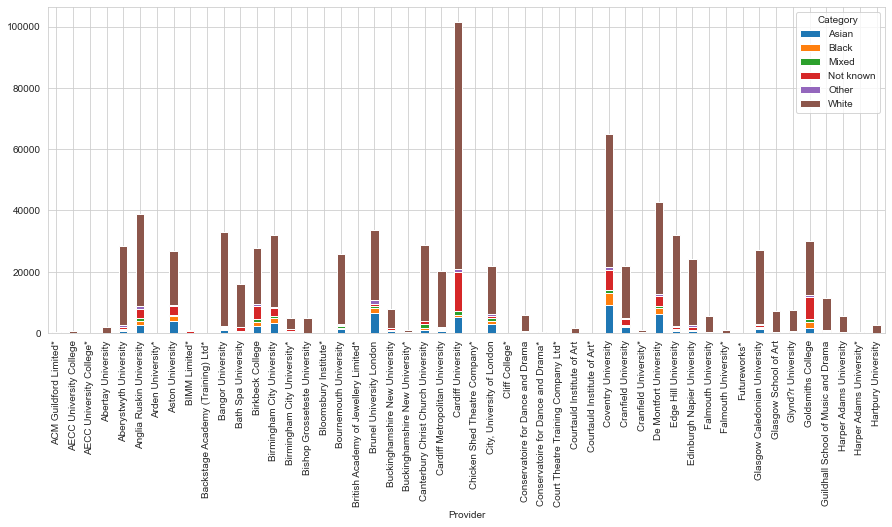

In [15]:
University_color.iloc[:50,:].plot(kind='bar',x='Provider', figsize =(15,6 ),stacked =True)

<AxesSubplot:xlabel='Provider'>

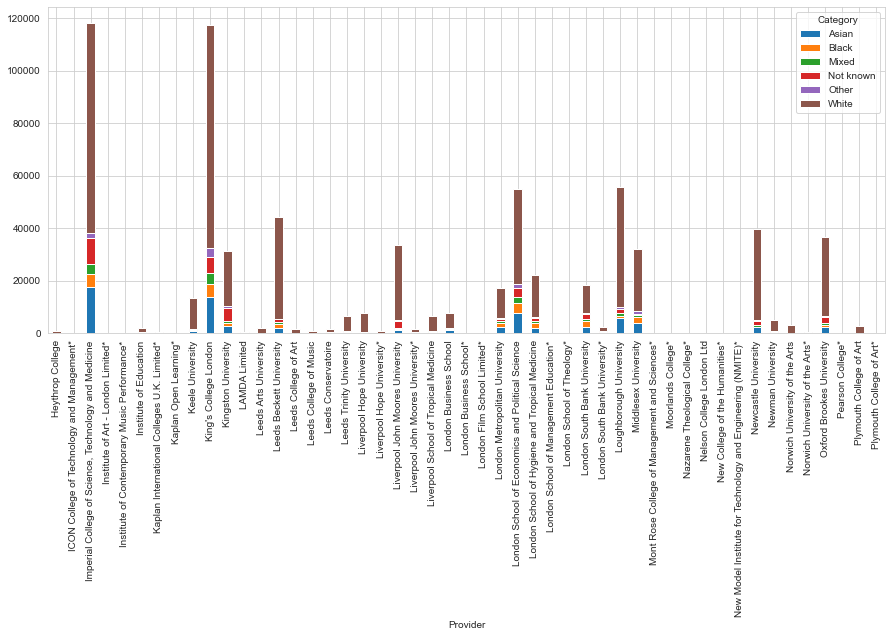

In [16]:
University_color.iloc[51:100,:].plot(kind='bar',x='Provider', figsize =(15,6 ),stacked =True)

<AxesSubplot:xlabel='Provider'>

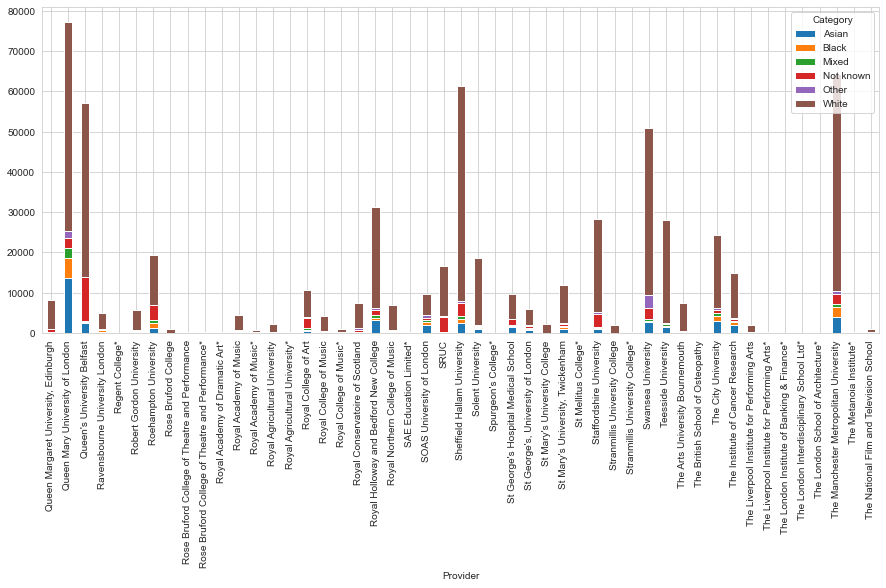

In [17]:
University_color.iloc[101:150,:].plot(kind='bar',x='Provider', figsize =(15,6 ),stacked =True)

<AxesSubplot:xlabel='Provider'>

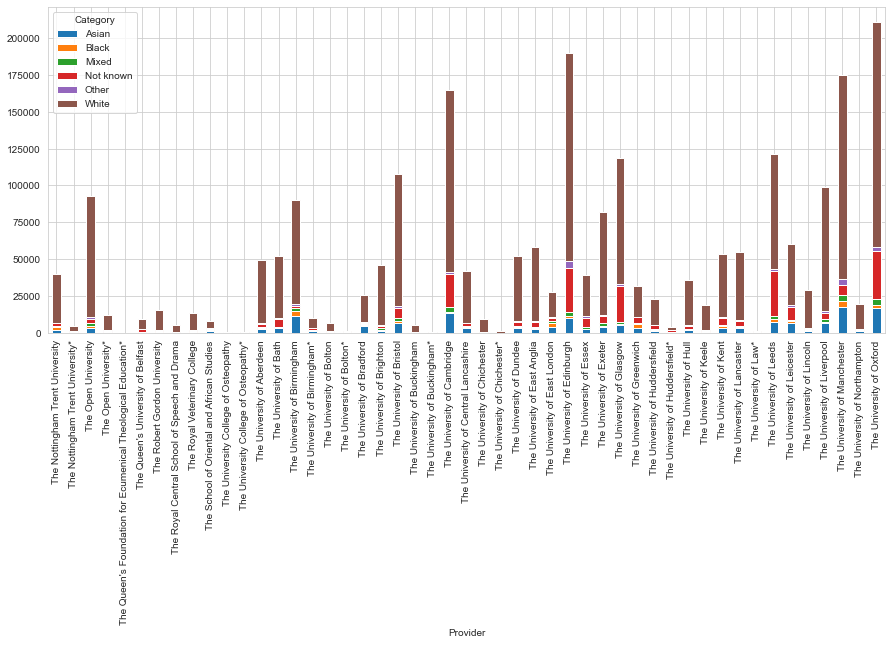

In [18]:
University_color.iloc[151:200,:].plot(kind='bar',x='Provider', figsize =(15,6 ),stacked =True)

In [19]:
#To find the the category
University_Ethnic_large =university_ethnicity.groupby(['Provider','Category'])['Number'].sum().unstack(fill_value=0).reset_index()


<AxesSubplot:xlabel='Provider'>

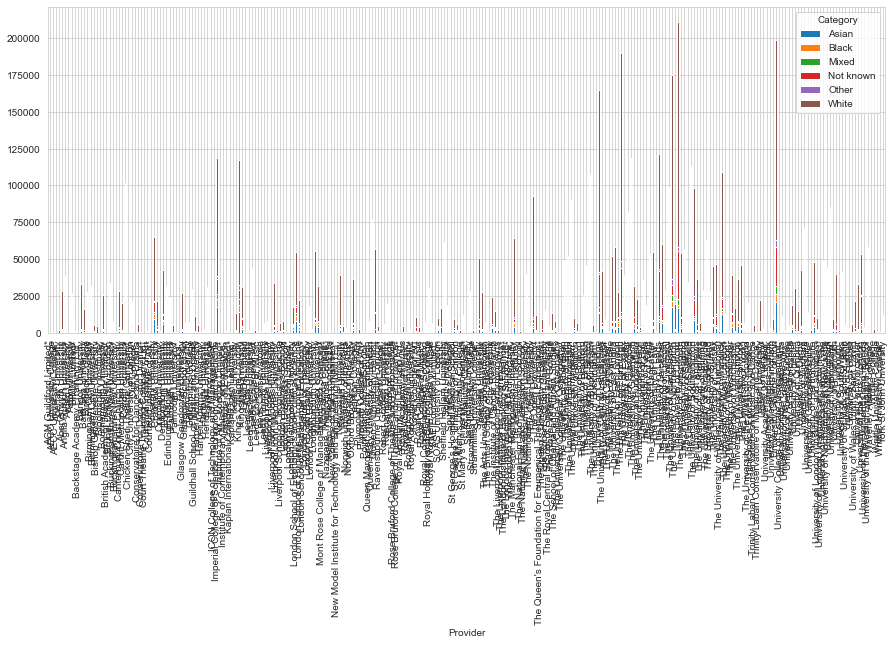

In [20]:
University_Ethnic_large.plot(kind='bar',x='Provider', figsize =(15,6 ),stacked =True)

In [21]:
df_all['Category_Marker'].unique()

array(['Ethnicity', 'Disability', 'Age group', 'Sex'], dtype=object)

In [22]:
df_all['Category'].unique()

array(['White', 'Black', 'Asian', 'Mixed', 'Other', 'Not known',
       'Known to be disabled', 'No known disability', '25 and under',
       '26 - 30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60',
       '61-65', '66 and over', 'Female', 'Male', 'Age Unknown'],
      dtype=object)

In [23]:
df_sex =df_all.query('Category_Marker =="Sex"')
df_sex

,UKPRN,Provider,Country,Region,Employment_Terms,Contract_levels,Atypical_Marker,Contract_Marker,Academic_Year,Category_Marker,Category,Number
18,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Sex,Female,650
19,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Sex,Male,695
26,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other senior academic,Non-atypical,Academic,2014/15,Sex,Female,10
27,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other senior academic,Non-atypical,Academic,2014/15,Sex,Male,15
40,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Professor,Non-atypical,Academic,2014/15,Sex,Female,55
...,...,...,...,...,...,...,...,...,...,...,...,...
209873,10007713,York St John University,England,Yorkshire and The Humber,Open-ended/Permanent,Professor,Non-atypical,All (excluding atypical),2020/21,Sex,Male,10
209883,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Non-academic,Non-atypical,All (excluding atypical),2020/21,Sex,Female,40
209884,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Non-academic,Non-atypical,All (excluding atypical),2020/21,Sex,Male,20
209901,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Sex,Female,45


In [24]:
df_sex['Category'].unique()


array(['Female', 'Male', 'Other'], dtype=object)

In [25]:
df_sex['Number'].isnull().any()

False

In [26]:

University_sex =df_sex.groupby(['Provider','Category'])['Number'].sum().unstack(fill_value=0).reset_index()

University_sex

Category,Provider,Female,Male,Other
0,ACM Guildford Limited*,45,170,0
1,AECC University College,390,255,0
2,AECC University College*,70,80,0
3,Abertay University,990,920,0
4,Aberystwyth University,14525,13840,0
...,...,...,...,...
259,Waverley Abbey College*,10,5,0
260,Writtle College,1775,895,0
261,Writtle University College,415,195,0
262,Writtle University College*,185,105,0


<AxesSubplot:xlabel='Provider'>

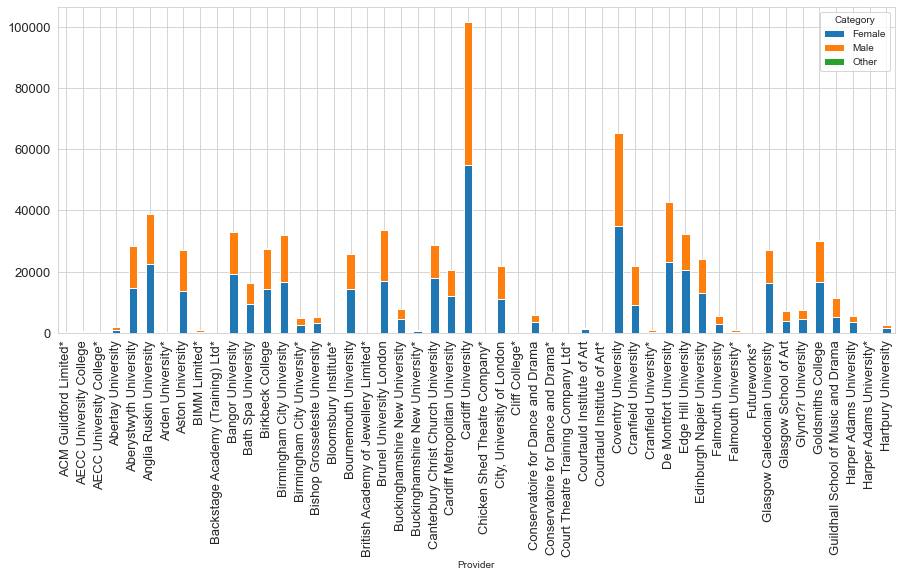

In [27]:
University_sex.iloc[:50,:].plot(kind='bar',x="Provider", stacked =True,figsize = (15,6),fontsize=13)

<AxesSubplot:xlabel='Provider'>

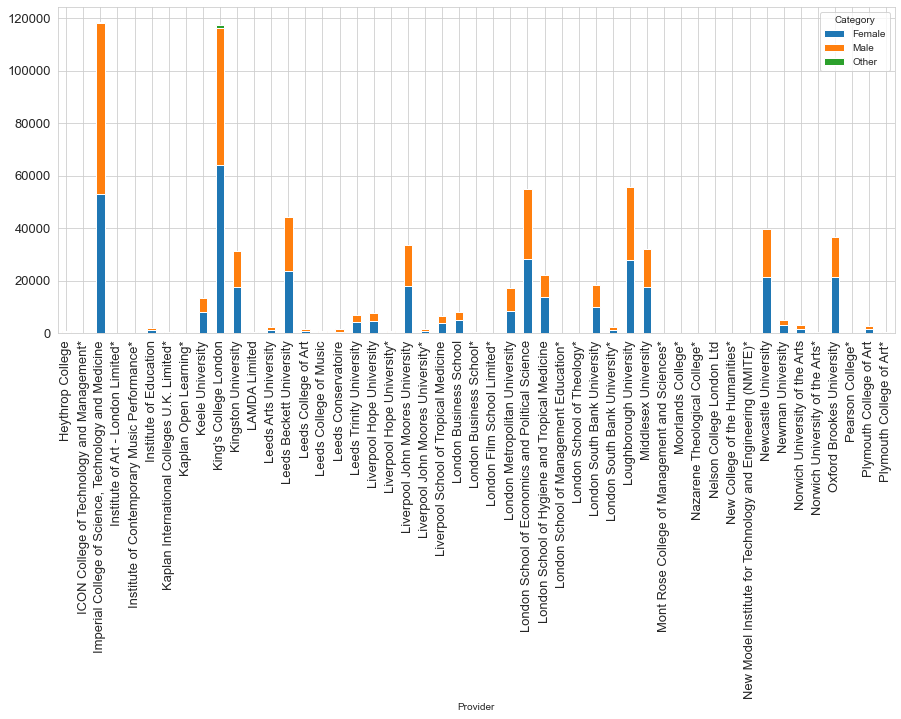

In [28]:
University_sex.iloc[51:100,:].plot(kind='bar',x="Provider",stacked=True, figsize = (15,6),fontsize=13)

<AxesSubplot:xlabel='Provider'>

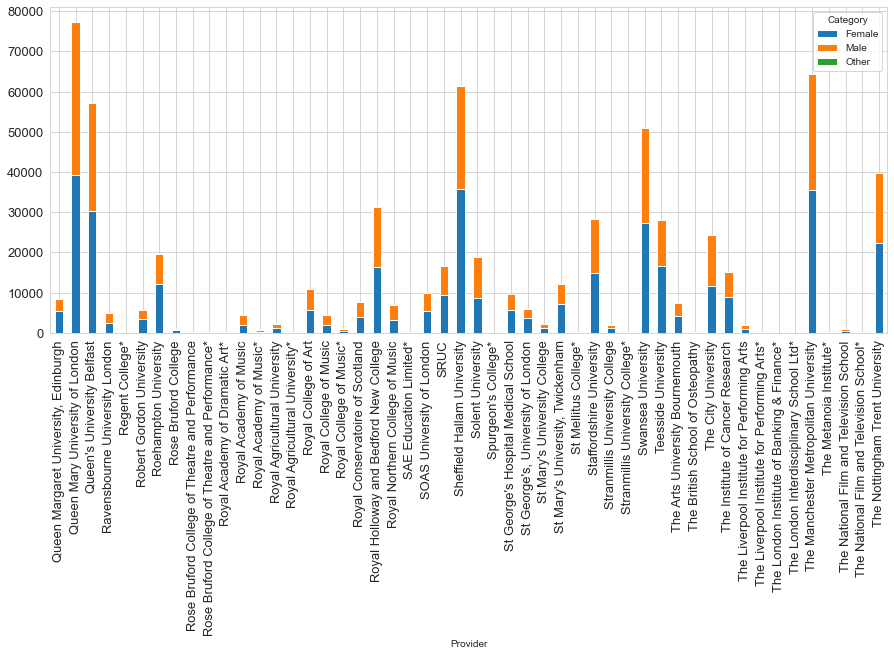

In [29]:
University_sex.iloc[101:151,:].plot(kind='bar',x="Provider", stacked =True,figsize = (15,6),fontsize=13)

In [30]:
df_group =df_all.query('Category_Marker =="Age group"')

In [31]:
df_group

,UKPRN,Provider,Country,Region,Employment_Terms,Contract_levels,Atypical_Marker,Contract_Marker,Academic_Year,Category_Marker,Category,Number
8,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Age group,25 and under,30
9,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Age group,26 - 30,165
10,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Age group,31-35,250
11,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Age group,36-40,230
12,10007783,The University of Aberdeen,Scotland,Scotland,Open-ended/Permanent,Other contract level,Non-atypical,Academic,2014/15,Age group,41-45,220
...,...,...,...,...,...,...,...,...,...,...,...,...
209896,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Age group,46-50,5
209897,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Age group,51-55,5
209898,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Age group,56-60,5
209899,10007713,York St John University,England,Yorkshire and The Humber,Fixed-term,Other contract level,Non-atypical,All (excluding atypical),2020/21,Age group,61-65,5


In [32]:
University_group =df_group.groupby(['Provider','Category'])['Number'].sum().unstack(fill_value=0).reset_index()

<AxesSubplot:xlabel='Provider'>

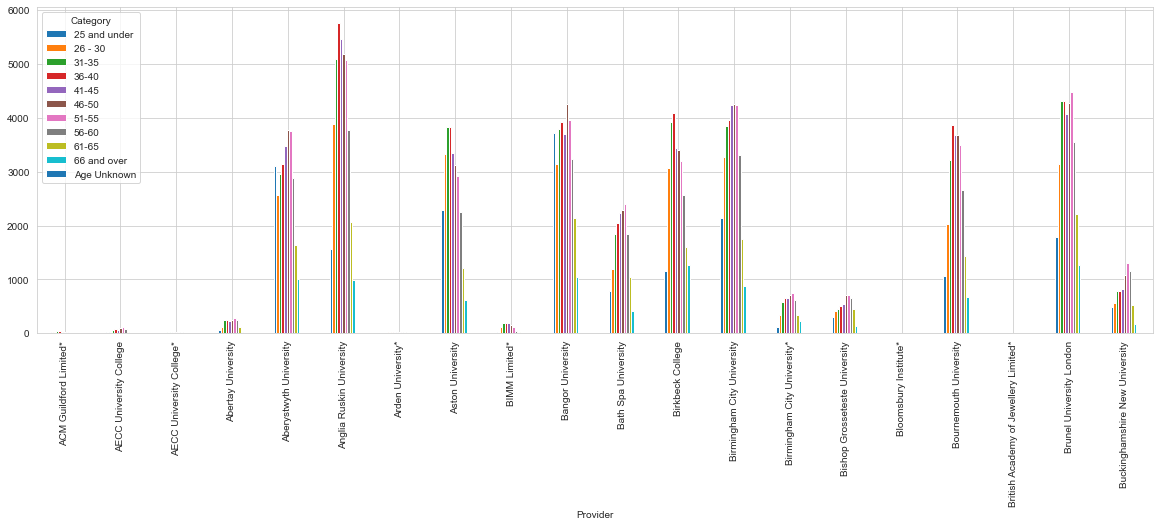

In [33]:
University_group.iloc[:20,:].plot(kind='bar',x="Provider",figsize = (20,6))

<AxesSubplot:xlabel='Provider'>

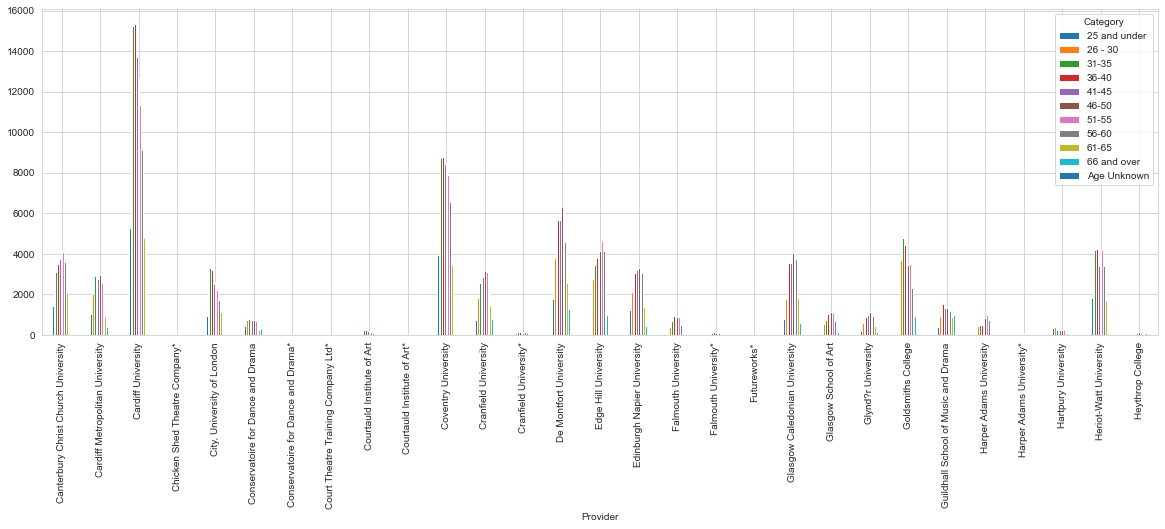

In [34]:
University_group.iloc[21:50,:].plot(kind='bar',x="Provider",figsize = (20,6))

In [35]:
df_

NameError: name 'df_' is not defined